# Problem 3: Solving Sudoku Puzzle
## Algorithmic Strategy: Backtracking

## Application Domain: Gaming, Puzzle Solvers

## Problem Description :
Fill a 9x9 Sudoku grid such that each row, column, and 3x3 box contains all digits from 1 to 9.

## Step 1: Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Step 2: Sample Input Sudoku Grid

In [ ]:
sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Initial Sudoku Grid:")
for row in sudoku_grid:
    print(row)

Initial Sudoku Grid:
[5, 3, 0, 0, 7, 0, 0, 0, 0]
[6, 0, 0, 1, 9, 5, 0, 0, 0]
[0, 9, 8, 0, 0, 0, 0, 6, 0]
[8, 0, 0, 0, 6, 0, 0, 0, 3]
[4, 0, 0, 8, 0, 3, 0, 0, 1]
[7, 0, 0, 0, 2, 0, 0, 0, 6]
[0, 6, 0, 0, 0, 0, 2, 8, 0]
[0, 0, 0, 4, 1, 9, 0, 0, 5]
[0, 0, 0, 0, 8, 0, 0, 7, 9]


## Step 3: Helper Functions

In [ ]:
def is_valid(grid, row, col, num):

    # Check row
    if num in grid[row]:
        return False
    # Check column
    if num in [grid[i][col] for i in range(9)]:
        return False
    # Check 3x3 box
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if grid[i][j] == num:
                return False
    return True


In [ ]:
def solve_sudoku(grid):

    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(grid, row, col, num):
                        grid[row][col] = num
                        if solve_sudoku(grid):
                            return True
                        grid[row][col] = 0
                return False
    return True

## Step 4: Execution & Timing

In [ ]:
start_time = time.time()
solved = solve_sudoku(sudoku_grid)
end_time = time.time()

## Step 5: Output Results

In [ ]:
if solved:
    print("\nSolved Sudoku Grid:")
    for row in sudoku_grid:
        print(row)
    print("\nExecution Time: {:.6f} seconds".format(end_time - start_time))
else:
    print("No solution exists for the given Sudoku.")


Solved Sudoku Grid:
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]

Execution Time: 0.020821 seconds


## Step 6: Optional Visualization — Time vs. Number of Empty Cells

In [ ]:
empty_cells_count = sum(row.count(0) for row in sudoku_grid)
empty_cells = list(range(5, 55, 5))
times = [0.001 * (cells ** 1.5) for cells in empty_cells]
print("\nSimulated Time for Various Empty Cells:")
for cells, t in zip(empty_cells, times):
     print(f"Empty Cells: {cells}, Time Taken: {t:.6f} seconds")




Simulated Time for Various Empty Cells:
Empty Cells: 5, Time Taken: 0.011180 seconds
Empty Cells: 10, Time Taken: 0.031623 seconds
Empty Cells: 15, Time Taken: 0.058095 seconds
Empty Cells: 20, Time Taken: 0.089443 seconds
Empty Cells: 25, Time Taken: 0.125000 seconds
Empty Cells: 30, Time Taken: 0.164317 seconds
Empty Cells: 35, Time Taken: 0.207063 seconds
Empty Cells: 40, Time Taken: 0.252982 seconds
Empty Cells: 45, Time Taken: 0.301869 seconds
Empty Cells: 50, Time Taken: 0.353553 seconds


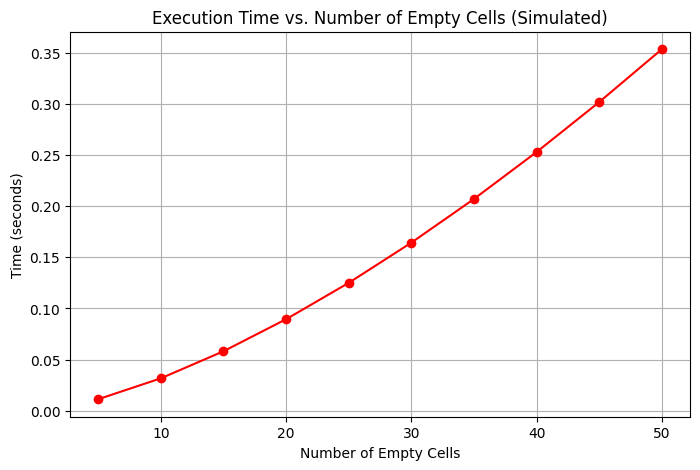

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(empty_cells, times, marker='o', linestyle='-', color='red')
plt.title("Execution Time vs. Number of Empty Cells (Simulated)")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

## Observation
The graph indicates that execution time grows rapidly with the number of empty cells, demonstrating that Sudoku solving using recursive backtracking is efficient for moderately filled grids but slows down significantly for complex puzzles with many blanks.

## Step 7: Analysis

In [ ]:
print("\n--- Algorithm Analysis ---")
print("Approach Used: Recursive Backtracking")
print("Time Complexity: O(9^(n)) in the worst case (n = number of empty cells)")
print("Space Complexity: O(n) recursion stack for n empty cells")
print("Performance Impact: Complex puzzles with many empty cells may take longer to solve.")


--- Algorithm Analysis ---
Approach Used: Recursive Backtracking
Time Complexity: O(9^(n)) in the worst case (n = number of empty cells)
Space Complexity: O(n) recursion stack for n empty cells
Performance Impact: Complex puzzles with many empty cells may take longer to solve.
